In [1]:
import os
import pickle
import importlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
#from skimage import exposure
#os.chdir('~/') #Select your working directory
cwd = os.getcwd()
#Functions=importlib.import_module("Functions")
#Functions=importlib.reload(Functions)
print(cwd)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


/home/ubuntu/Etude-de-Cas


In [2]:
def load_pickled_data(file, columns):
    with open(file, mode='rb') as f:
        dataset = pickle.load(f)
    return tuple(map(lambda c: dataset[c], columns))

def preprocess_dataset(X):
    #Convert to grayscale, e.g. single Y channel
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]
    #Scale features to be in [0, 1]
    X = (X / 255.).astype(np.float32)

    # Add a single grayscale channel
    X = X.reshape(X.shape + (1,)) 
    return X

In [8]:
X_train, y_train = load_pickled_data("train.p", ['features', 'labels'])
X_test, y_test = load_pickled_data("test.p", ['features', 'labels'])

In [9]:
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

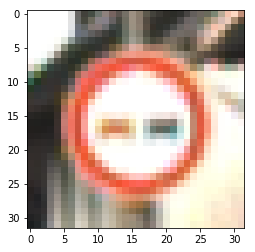

shape of the train set:(39209, 32, 32, 3)


In [10]:
from keras.utils import to_categorical
target_train = to_categorical(y_train)
target_test=to_categorical(y_test)


plt.imshow(X_train[412])
plt.show()

#X_train=preprocess_dataset(X_train)
#X_test=preprocess_dataset(X_test)

#plt.imshow(X_train[412].reshape(32,32))
#plt.show()

print("shape of the train set:"+str(X_train.shape))

num_classes=target_train.shape[1]

input_shape=X_train[1].shape

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=2)

In [15]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))



In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [16]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [17]:
model.fit(X_train,target_train,
          epochs=20,
          validation_split=0.3,
          callbacks=[early_stopping_monitor])

Train on 27446 samples, validate on 11763 samples
Epoch 1/20
27446/27446 [==============================] - 8s 298us/step - loss: 8.6248 - acc: 0.1427 - val_loss: 1.5635 - val_acc: 0.6174
Epoch 2/20
27446/27446 [==============================] - 8s 281us/step - loss: 1.3066 - acc: 0.6560 - val_loss: 0.5032 - val_acc: 0.8808
Epoch 3/20
27446/27446 [==============================] - 8s 281us/step - loss: 0.6915 - acc: 0.8116 - val_loss: 0.2226 - val_acc: 0.9477
Epoch 4/20
27446/27446 [==============================] - 8s 281us/step - loss: 0.4709 - acc: 0.8726 - val_loss: 0.1730 - val_acc: 0.9577
Epoch 5/20
27446/27446 [==============================] - 8s 280us/step - loss: 0.3471 - acc: 0.9046 - val_loss: 0.1213 - val_acc: 0.9702
Epoch 6/20
27446/27446 [==============================] - 8s 279us/step - loss: 0.2811 - acc: 0.9242 - val_loss: 0.1114 - val_acc: 0.9759
Epoch 7/20
27446/27446 [==============================] - 8s 279us/step - loss: 0.2377 - acc: 0.9397 - val_loss: 0.1421 - 

In [18]:
model.evaluate(X_test, target_test)

12630/12630 [==============================] - 1s 90us/step


[0.2253395825198255, 0.9537608867491981]

In [19]:
model.save("second_model.hd5")